The previous two notebooks collated a collection of bibliometric records for analysis, 
followed by an initial filtering to constrain the number of publications as much as possible.

In this notebook we constrain the number of publications as much as possible based on identification of relevant topics and study areas

In [1]:
%run "Common Setup.ipynb"

In [2]:
filtered_rc = wosis.load_query_results('{}/initial_filtered_corpora.txt'.format(TMP_DIR))
num_records = []

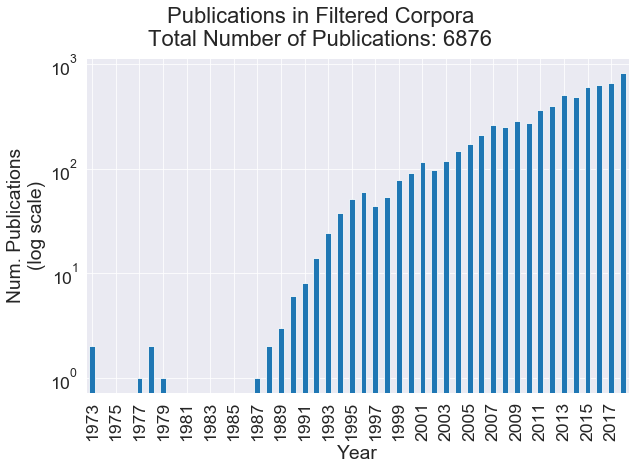

In [3]:
wos_plot.plot_pub_trend(filtered_rc, title='Publications in Filtered Corpora', 
                        save_plot_fn='{}/filtered_pub_trend'.format(FIG_DIR))

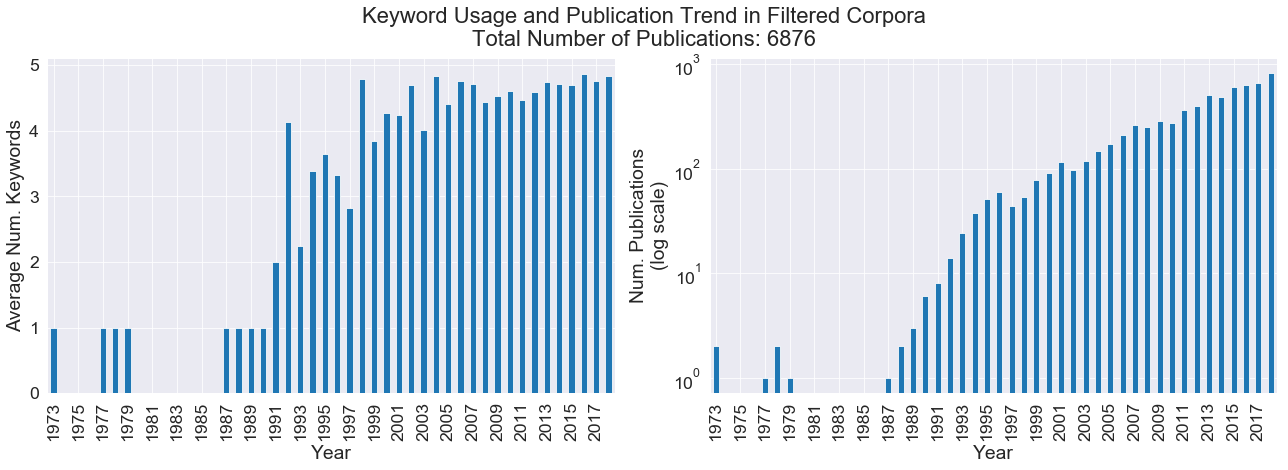

In [4]:
wos_plot.plot_kw_trend(filtered_rc, title='Keyword Usage and Publication Trend in Filtered Corpora', 
                       save_plot_fn='{}/num_kw_per_filtered_pub'.format(FIG_DIR))

In [5]:
filtered_df = wosis.rc_to_df(filtered_rc)

earliest_year = min(filtered_df.year)
latest_year = max(filtered_df.year)

early_papers = filtered_df.loc[filtered_df['year'] == earliest_year, :]

link_to_early_papers = wosis.link_to_pub(early_papers)
link_to_early_papers.loc[:, ~link_to_early_papers.columns.isin(hide_columns)]

,AU,SO,copyright,title,year,DOI link
943,"HOUSE, PW",SIMULATION,,ENVIRONMENTAL MODELING VS CHICKEN-SOUP APPROAC...,1973,https://dx.doi.org/10.1177/003754977302000601
4053,"MCKENNA, N",SIMULATION,,ENVIRONMENTAL MODELING,1973,https://dx.doi.org/10.1177/003754977302000201


In [6]:
pubs_in_first_year = filtered_df.groupby('year').count()['title'][min(filtered_df.year)]
pubs_in_last_year = filtered_df.groupby('year').count()['title'][max(filtered_df.year)]

print("Publications in {}:".format(earliest_year), pubs_in_first_year)
print("Publications in {}:".format(latest_year), pubs_in_last_year)

Publications in 1973: 2
Publications in 2018: 822


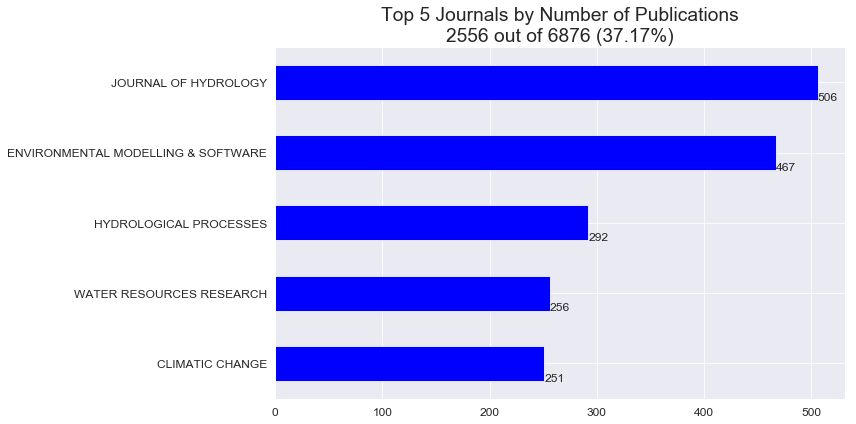

In [7]:
wos_plot.plot_pubs_per_journal(filtered_rc, top_n=5, annotate=True, show_stats=True, 
                               save_plot_fn='{}/filtered_top5_journal_pubs'.format(FIG_DIR))

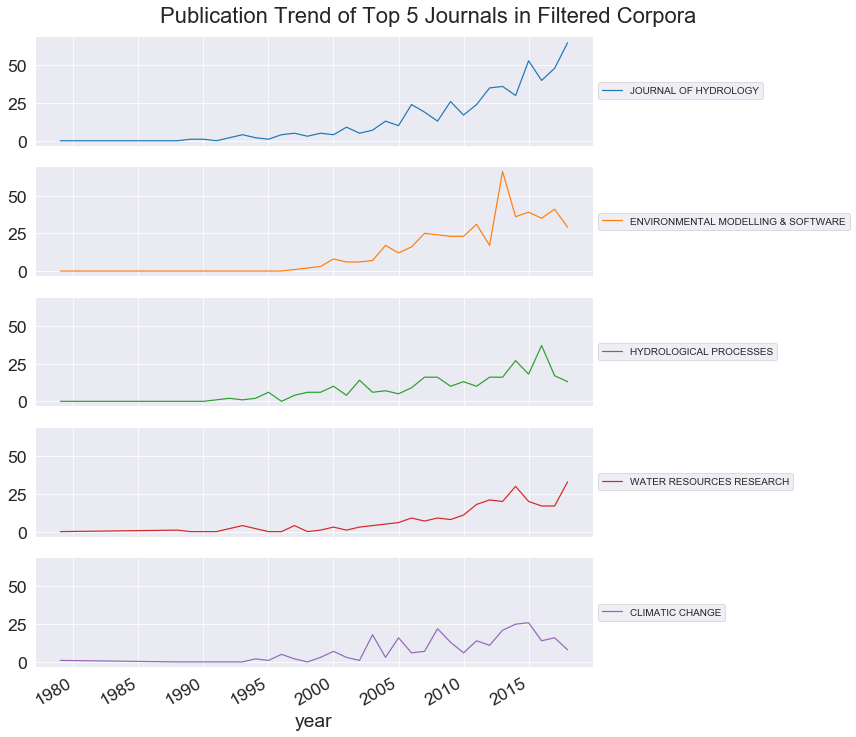

In [9]:
wos_plot.plot_journal_pub_trend(filtered_rc, top_n=5, title='Publication Trend of Top 5 Journals in Filtered Corpora',
                                save_plot_fn='{}/filtered_top5_journal_trends'.format(FIG_DIR))

<hr>